In [33]:
from mflex.simulate.simulate_boundary import dipole, dalmatian
from mflex.model.field.utility.seehafer import mirror_magnetogram
import numpy as np
import matplotlib.pyplot as plt

In [34]:
xmin = 0.0
ymin = 0.0
zmin = 0.0
xmax = 2.0
ymax = 2.0
zmax = 2.0

nresol_x = 200
nresol_y = 200
nresol_z = 400
nf_max = 200

pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

z0 = 0.2
deltaz = 0.02

length_scale = 1.0
length_scale_x = 1.0 * nresol_x * float(pixelsize_x)
length_scale_y = 1.0 * nresol_y * float(pixelsize_y)
length_scale_x_norm = length_scale_x / length_scale
length_scale_y_norm = length_scale_y / length_scale

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

data_bz = np.zeros((nresol_y, nresol_x))
data_bz2 = np.zeros((nresol_y, nresol_x))

x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dipole(x, y)
        data_bz2[iy, ix] = dalmatian(x, y)

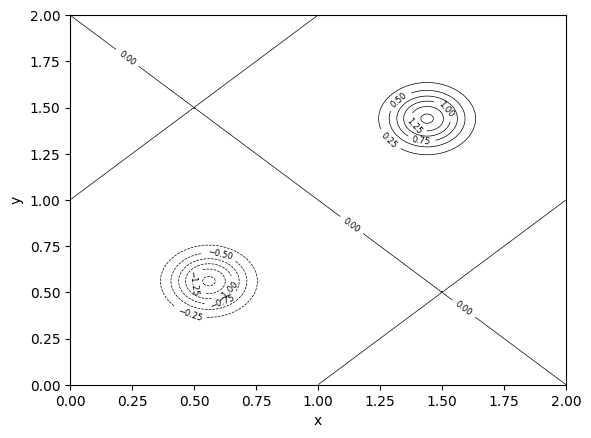

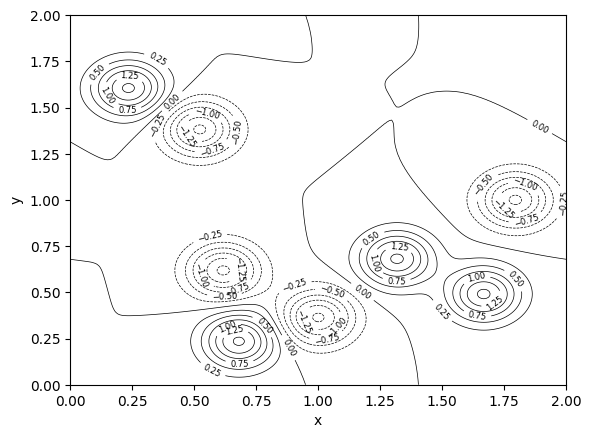

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(y_plot, x_plot, data_bz, 12, colors="k", linewidths=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.clabel(CS, fontsize=6, inline=True)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(y_plot, x_plot, data_bz2, 12, colors="k", linewidths=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.clabel(CS, fontsize=6, inline=True)
plt.show()

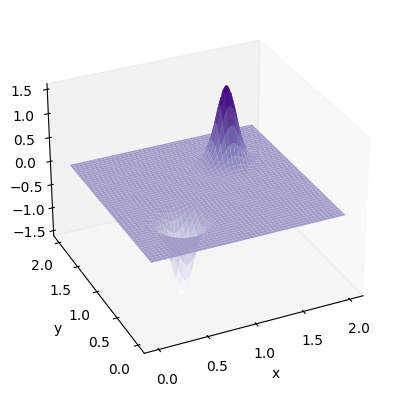

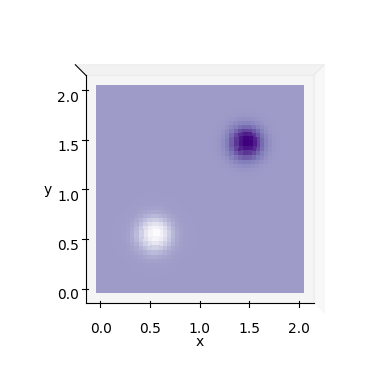

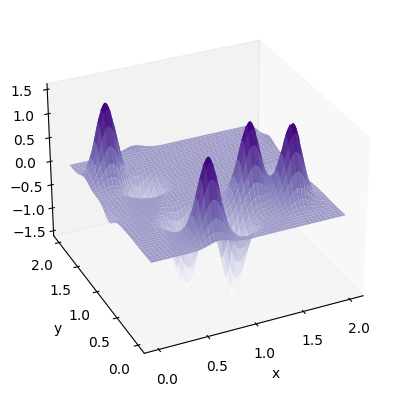

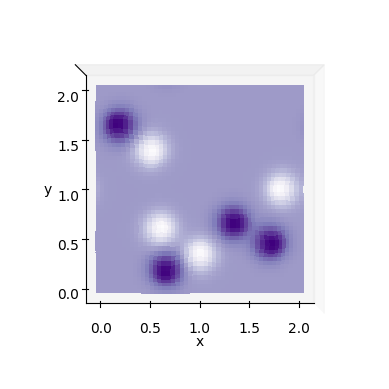

In [36]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(y_plot, x_plot, data_bz, cmap="Purples")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, -115, 0)
ax.grid(False)
# plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_surface1.png"
# plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(y_plot, x_plot, data_bz, cmap="Purples", antialiased=False)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(90, -90, 0)
ax.grid(False)
ax.set_zticks([])
# plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_surface2.png"
# plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(y_plot, x_plot, data_bz2, cmap="Purples")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, -115, 0)
ax.grid(False)
# plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_surface1.png"
# plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(y_plot, x_plot, data_bz2, cmap="Purples", antialiased=False)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(90, -90, 0)
ax.grid(False)
ax.set_zticks([])
# plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_surface2.png"
# plt.savefig(plotname, dpi=300)
plt.show()

In [37]:
data_bz_seehafer2 = mirror_magnetogram(
    data_bz2, xmin, xmax, ymin, ymax, nresol_x, nresol_y
)

data_bz_seehafer = mirror_magnetogram(
    data_bz, xmin, xmax, ymin, ymax, nresol_x, nresol_y
)

In [38]:
x_arr = np.arange(2.0 * nresol_x) * 2.0 * xmax / (2.0 * nresol_x - 1) - xmax
y_arr = np.arange(2.0 * nresol_y) * 2.0 * ymax / (2.0 * nresol_y - 1) - ymax
x_plot = np.outer(y_arr, np.ones(int(nresol_x * 2.0)))
y_plot = np.outer(x_arr, np.ones(int(nresol_y * 2.0))).T

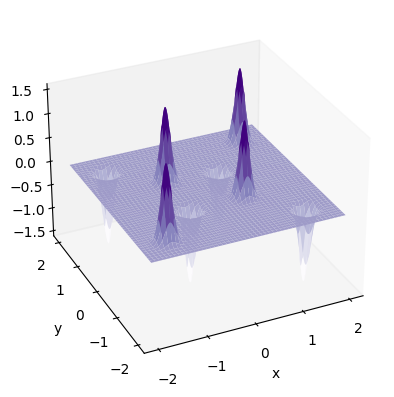

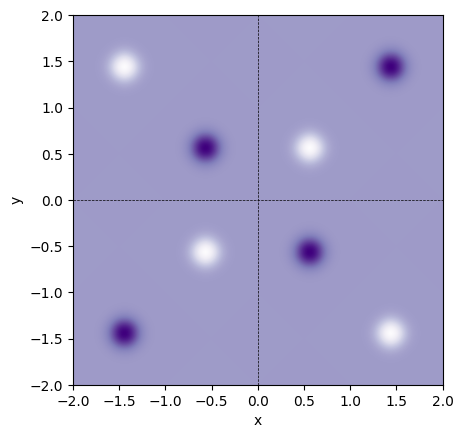

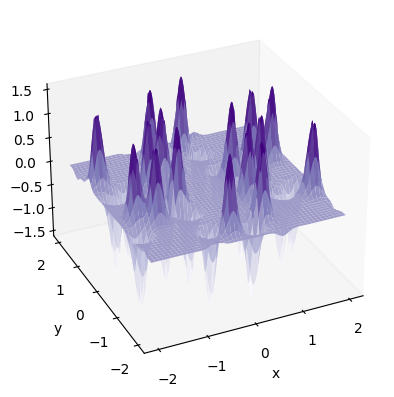

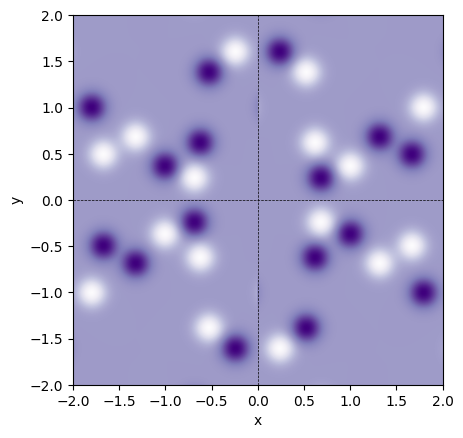

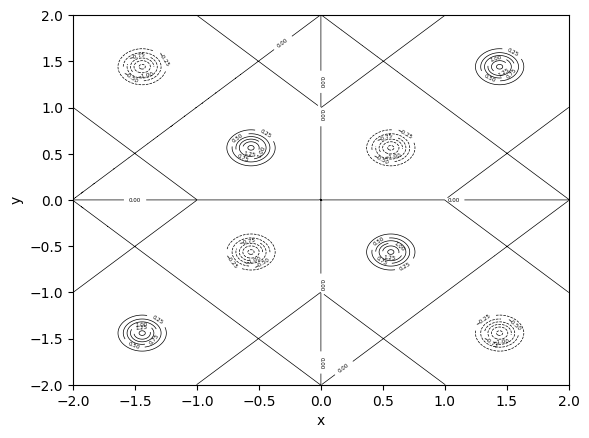

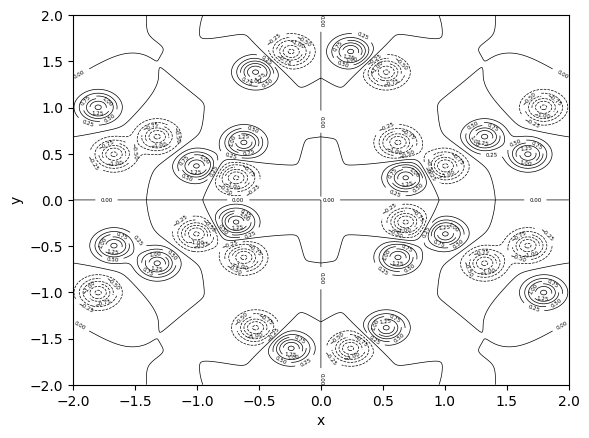

In [39]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(y_plot, x_plot, data_bz_seehafer, cmap="Purples")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, -115, 0)
ax.grid(False)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/seehaferex11.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, data_bz_seehafer, 1000, cmap="Purples")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_box_aspect(1)
plt.axhline(y=0, color="black", linestyle="dashed", linewidth=0.5)
plt.axvline(x=0, color="black", linestyle="dashed", linewidth=0.5)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/seehaferex12.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(y_plot, x_plot, data_bz_seehafer2, cmap="Purples")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, -115, 0)
ax.grid(False)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/seehaferex21.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, data_bz_seehafer2, 1000, cmap="Purples")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_box_aspect(1)
plt.axhline(y=0, color="black", linestyle="dashed", linewidth=0.5)
plt.axvline(x=0, color="black", linestyle="dashed", linewidth=0.5)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/seehaferex22.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(y_plot, x_plot, data_bz_seehafer, 12, colors="k", linewidths=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.clabel(CS, fontsize=4, inline=True)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/seehaferexcontour1.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(y_plot, x_plot, data_bz_seehafer2, 12, colors="k", linewidths=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.clabel(CS, fontsize=4, inline=True)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/seehaferexcontour2background.png"
plt.savefig(plotname, dpi=300,transparent=True)
plt.show()
